[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/masanorihirano/pams/blob/main/examples/shock_transfer.ipynb)

In [1]:
# Please remove comment-out if necessary
#! pip install pams matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
config = {
	"simulation": {
		"markets": ["SpotMarket-1", "SpotMarket-2", "IndexMarket-I"],
		"agents": ["FCNAgents-1", "FCNAgents-2", "FCNAgents-I", "ArbitrageAgents"],
		"sessions": [
			{	"sessionName": 0,
				"iterationSteps": 100,
				"withOrderPlacement": True,
				"withOrderExecution": False,
				"withPrint": True,
				"maxNormalOrders": 3, "MEMO": "The same number as #markets",
				"maxHighFrequencyOrders": 0
			},
			{	"sessionName": 1,
				"iterationSteps": 500,
				"withOrderPlacement": True,
				"withOrderExecution": True,
				"withPrint": True,
				"maxNormalOrders": 3, "MEMO": "The same number as #markets",
				"maxHighFrequencyOrders": 5,
				"events": ["FundamentalPriceShock"]
			}
		]
	},

	"FundamentalPriceShock": {
		"class": "FundamentalPriceShock",
		"target": "SpotMarket-1",
		"triggerTime": 0,
		"priceChangeRate": -0.3,
		"enabled": True
	},
	"SpotMarket": {
		"class": "Market",
		"tickSize": 0.00001,
		"marketPrice": 300.0,
		"outstandingShares": 25000
	},
	"SpotMarket-1": {
		"extends": "SpotMarket"
	},
	"SpotMarket-2": {
		"extends": "SpotMarket"
	},
	"IndexMarket-I": {
		"class": "IndexMarket",
		"tickSize": 0.00001,
		"marketPrice": 300.0,
		"outstandingShares": 25000,
		"markets": ["SpotMarket-1", "SpotMarket-2"]
	},
	"FCNAgent": {
		"class": "FCNAgent",
		"numAgents": 100,
		"markets": ["Market"],
		"assetVolume": 50,
		"cashAmount": 10000,

		"fundamentalWeight": {"expon": [1.0]},
		"chartWeight": {"expon": [0.0]},
		"noiseWeight": {"expon": [1.0]},
		"noiseScale": 0.001,
		"timeWindowSize": [100, 200],
		"orderMargin": [0.0, 0.1]
	},

	"FCNAgents-1": {
		"extends": "FCNAgent",
		"markets": ["SpotMarket-1"]
	},
	"FCNAgents-2": {
		"extends": "FCNAgent",
		"markets": ["SpotMarket-2"]
	},
	"FCNAgents-I": {
		"extends": "FCNAgent",
		"markets": ["IndexMarket-I"]
	},
	"ArbitrageAgents": {
		"class": "ArbitrageAgent",
		"numAgents": 100,
		"markets": ["IndexMarket-I", "SpotMarket-1", "SpotMarket-2"],
		"assetVolume": 50,
		"cashAmount": 150000,
		"orderVolume": 1,
		"orderThresholdPrice": 1.0
	}
}

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from pams.runners import SequentialRunner
from pams.logs.market_step_loggers import MarketStepSaver

In [4]:
saver = MarketStepSaver()

runner = SequentialRunner(
    settings=config,
    prng=random.Random(42),
    logger=saver,
)
runner.main()

/usr/local/lib/python3.9/dist-packages/pams/market.py:735: UserWarning: order price does not accord to the tick size. price will be modified
  warnings.warn(


# INITIALIZATION TIME 0.012723214
# EXECUTION TIME 1.689226608


In [5]:
market_prices_indexmarket_i = dict(sorted(map(lambda x: (x["market_time"], x["market_price"]), filter(lambda x: x["market_name"] == "IndexMarket-I", saver.market_step_logs))))
market_prices_spotmarket_1 = dict(sorted(map(lambda x: (x["market_time"], x["market_price"]), filter(lambda x: x["market_name"] == "SpotMarket-1", saver.market_step_logs))))
market_prices_spotmarket_2 = dict(sorted(map(lambda x: (x["market_time"], x["market_price"]), filter(lambda x: x["market_name"] == "SpotMarket-2", saver.market_step_logs))))

fundamental_prices_indexmarket_i = dict(sorted(map(lambda x: (x["market_time"], x["fundamental_price"]), filter(lambda x: x["market_name"] == "IndexMarket-I", saver.market_step_logs))))
fundamental_prices_spotmarket_1 = dict(sorted(map(lambda x: (x["market_time"], x["fundamental_price"]), filter(lambda x: x["market_name"] == "SpotMarket-1", saver.market_step_logs))))
fundamental_prices_spotmarket_2 = dict(sorted(map(lambda x: (x["market_time"], x["fundamental_price"]), filter(lambda x: x["market_name"] == "SpotMarket-2", saver.market_step_logs))))

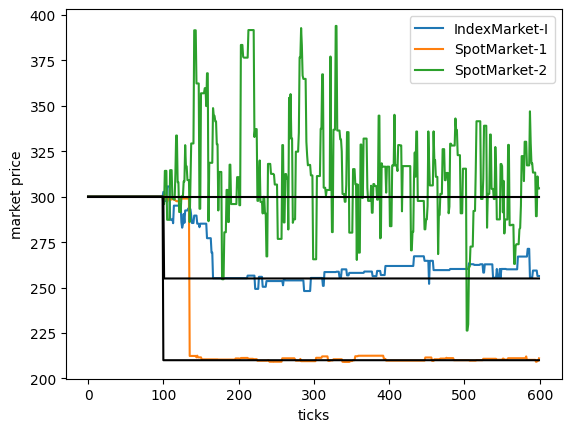

In [6]:
plt.plot(list(market_prices_indexmarket_i.keys()), list(market_prices_indexmarket_i.values()), label="IndexMarket-I")
plt.plot(list(market_prices_spotmarket_1.keys()), list(market_prices_spotmarket_1.values()), label="SpotMarket-1")
plt.plot(list(market_prices_spotmarket_2.keys()), list(market_prices_spotmarket_2.values()), label="SpotMarket-2")
plt.plot(list(fundamental_prices_indexmarket_i.keys()), list(fundamental_prices_indexmarket_i.values()), color='black')
plt.plot(list(fundamental_prices_spotmarket_1.keys()), list(fundamental_prices_spotmarket_1.values()), color='black')
plt.plot(list(fundamental_prices_spotmarket_2.keys()), list(fundamental_prices_spotmarket_2.values()), color='black')
plt.xlabel("ticks")
plt.ylabel("market price")
plt.legend()
plt.show()